# Non-commutation of rotations

In quantum mechanics the order in which operators act is often essential. This exercise takes us trough a couple of examples, which illustrates this. 

**Learning goal:** To realize the importance of the order in which operators act.


# The q-bit as a spin 1/2 system

Throughout this exercise we use only a single q-bit. We will think of this q-bit as a spin 1/2 system, identifying the q-bit state $|0\rangle$ with the state $|s,m\rangle=|1/2,-1/2\rangle$ and likevise identify $|1\rangle$ with $|s,m\rangle=|1/2,1/2\rangle$. If we measure the q-bit and find '0' ('1') the intrepretaion therefore is that we have measured $S_z$ and found the value $-\hbar/2$ ($\hbar/2$).


Let's start the system in the state 

\begin{equation}
|\psi\rangle = |1/2,1/2⟩
\end{equation}

and then perform a rotation around the $z$-axis through the angle $\phi=\pi$. 

In the basis ($|1/2,1/2\rangle,|1/2,-1/2\rangle$) the state $|1/2,1/2⟩$ is represented by

\begin{equation}
\left(\begin{array}{c} 1 \\ 0 \end{array}\right)
\end{equation}

and the operator performing rotations around the $z$-axis is 

\begin{equation}
R_z(\phi) = \left(\begin{array}{cc} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{array}\right) \ .
\end{equation}

We will first rotate and then measure the $S_z$.

**Exercise 1 / Your prediction:** Predict the outcome of the measurement. Does the result depend on $\phi$?


Now let's test your prediction!

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import*
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

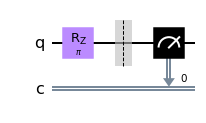

In [2]:
from math import pi
circ = QuantumCircuit(1,1)
phi = pi
circ.rz(phi,0)
circ.barrier()
circ.measure(0,0)
circ.draw()

In [3]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


**Exercise 2 / Evaluate:** Does the result correspond to your prediction?

Above we chose the value $\phi=\pi$, was this essential for your prediction? What happens if you change the value and run the code again?


Next let us consider a rotation about the $x$-axis

In the basis ($|1/2,1/2\rangle,|1/2,-1/2\rangle$) the (unitary) operator performing rotations around the $x$-axis is 

\begin{equation}
R_x(\theta) = \left(\begin{array}{cc} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{array}\right) \ .
\end{equation}

Let's replace the $R_z(\phi)$ rotation we did above by $R_x(\theta)$ with $\theta=\pi/2$ and repeat the experiment.  

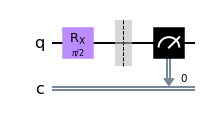

In [4]:
from math import pi
circ = QuantumCircuit(1,1)
theta = pi/2
circ.rx(theta,0)
circ.barrier()
circ.measure(0,0)
circ.draw()

**Notation:** The vertical grey band with the black dashed line in the middle is just there for visual purposes. It does not make any operation.

In [5]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['0', '0', '1', '1', '1', '1', '0', '1', '1', '1']


**Exercise 3:** Explain the outcome of the experiment.

To see that the order of the rotation operators matter consider the following rotations  $R_x(-\theta)R_z(\phi)R_x(\theta)$. If we could swap the order of the operations we could rewrite this as $R_x(-\theta)R_x(\theta)R_z(\phi)=R_z(\phi)$ (**wrong!). However, as we will see explicitly this is not the case. 

**Exercise 4:** Above we used that $R_x(-\theta)R_x(\theta)=1$. Show this identity using the matrix representation of $R_x(\theta)$ and give your intrepretation of this result.

Let's now perform an experiment with the rotations  $R_x(\theta)R_z(\phi)R_x(-\theta)$ and compare it to the result we got using just $R_z(\phi)$. We will use the values $\theta=\pi/2$ and $\phi=\pi$. 



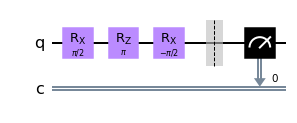

In [6]:
from math import pi
circ = QuantumCircuit(1,1)
theta = pi/2
phi = pi
circ.rx(theta,0)
circ.rz(phi,0)
circ.rx(-theta,0)
circ.barrier()
circ.measure(0,0)
circ.draw()

In [ ]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

Compared to the case where we only had $R_z(\phi)$ we now get completely the opposite result!

**Exercise 5:** Explicitly compute the matrix representing $R_x(-\theta)R_z(\phi)R_x(\theta)$ and let it act on the state $|1/2,1/2\rangle$. Why does your result explain the outcome of the measurement above? (Don't forget that we use the values $\theta=\pi/2$ and $\phi=\pi$.)

**Take home:** The order in which operators act in general matters. As an example we have here worked with rotations around the $z$-axis and around the $x$-axis which do not commute. 